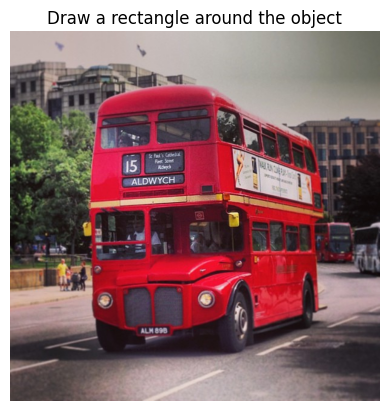

No bounding box selected.
None


In [ ]:
import cv2
import matplotlib.pyplot as plt
from matplotlib.widgets import RectangleSelector
from detectron2.structures import BoxMode
import json
import os

def annotate_image_with_detectron2(image_path):
    """
    Interactive image cropping using Matplotlib in Jupyter Notebook.
    
    Args:
        image_path (str): Path to the input image.
    
    Returns:
        dict: Annotation data ready for Detectron2 in JSON format.
    """
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"File not found: {image_path}")

    # Load and display the image
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.imshow(image)
    plt.title("Draw a rectangle around the object")
    plt.axis("off")

    bbox = []  # To store bounding box [x, y, w, h]

    def onselect(eclick, erelease):
        """
        Callback for RectangleSelector: captures bounding box coordinates.
        """
        nonlocal bbox
        x1, y1 = int(eclick.xdata), int(eclick.ydata)
        x2, y2 = int(erelease.xdata), int(erelease.ydata)
        bbox = [min(x1, x2), min(y1, y2), abs(x2 - x1), abs(y2 - y1)]
        print(f"Bounding box selected: {bbox}")
        plt.close(fig)  # Close the figure after selection

    # Initialize RectangleSelector
    rect_selector = RectangleSelector(
        ax, onselect, drawtype="box", useblit=True,
        button=[1], minspanx=5, minspany=5, interactive=True
    )
    plt.show()

    # If no bounding box was selected
    if not bbox:
        print("No bounding box selected.")
        return None

    # Ask user for the category ID
    try:
        category_id = int(input("Enter the category ID for the selected region: "))
    except ValueError:
        print("Invalid category ID. Please enter an integer.")
        return None

    # Create Detectron2-compatible annotation
    annotation = {
        "iscrowd": 0,
        "bbox": bbox,  # [x, y, width, height]
        "category_id": category_id,
        "segmentation": [],  # Leave empty if not used
        "bbox_mode": BoxMode.XYWH_ABS,
    }

    # Convert to JSON and display
    annotation_json = json.dumps([annotation], indent=4)

    return annotation_json

# Example usage
annotate_image_with_detectron2("demo/imgs/000000001584.jpg")
